In [1]:
import gym
import lake_envs as lake_env
import time
import numpy as np
from example import *
import pi_vi


In [2]:
def gen_env(env_name):
    env = gym.make(env_name)
    env.seed(0)
    return env


env = gen_env('Deterministic-4x4-FrozenLake-v0')

print_env_info(env)
print_model_info(env, 0, lake_env.DOWN)
print_model_info(env, 1, lake_env.DOWN)
print_model_info(env, 14, lake_env.RIGHT)


Environment has 16 states and 4 actions.
According to transition function, taking action DOWN(1) in state 0 leads to 1 possible outcomes
	Transitioning to non-terminal state 4 with probability 1.000000 and reward 0.000000
According to transition function, taking action DOWN(1) in state 1 leads to 1 possible outcomes
	Transitioning to terminal state 1 with probability 1.000000 and reward 0.000000
According to transition function, taking action RIGHT(2) in state 14 leads to 1 possible outcomes
	Transitioning to non-terminal state 15 with probability 1.000000 and reward 0.000000


## Random Policy

In [3]:
# env = gym.make('Deterministic-4x4-FrozenLake-v0')

# initial_state = env.reset()
# env.render()
# time.sleep(1)  # just pauses so you can see the output

# total_reward = 0
# num_steps = 0
# while True:
#     nextstate, reward, is_terminal, debug_info = env.step(
#         env.action_space.sample())
#     env.render()

#     total_reward += reward
#     num_steps += 1

#     if is_terminal:
#         break

#     time.sleep(1)

# print('Agent received total reward of: %f' % total_reward)
# print('Agent took %d steps' % num_steps)
# total_reward, num_steps


## Syncronous Policy Iteration

In [4]:
init_state = env.reset()
print("init_state: ", init_state)
env.render()
env.P[0][lake_env.RIGHT]
env.P[2]


init_state:  2

FHSF
FGHF
FHHF
FFFF


{0: [(1.0, 1, 0.0, True)],
 1: [(1.0, 6, 0.0, True)],
 2: [(1.0, 3, 0.0, False)],
 3: [(1.0, 2, 0.0, False)]}


FHSF
FGHF
FHHF
FFFF
running policy:  sync
state_value_func [0.28203308 0.70437214 0.99731502 0.18390477 0.12039772 0.85877675
 0.59111776 0.01441719 0.7477361  0.2866088  0.98353769 0.0642197
 0.14057045 0.88346219 0.60394994 0.38302195]
init policy:  [1 1 0 0 1 1 0 3 1 0 3 2 3 0 0 2]
total_policy_eval_steps:  69
DLLL
RLLD
ULLL
LRDL
Agent took 0 steps

FFFFFSFF
FFFFFFFF
HHHHHHFF
FFFFFFFF
FFFFFFFF
FHFFFHHF
FHFFHFHH
FGFFFFFF
running policy:  sync
state_value_func [0.52357245 0.7384395  0.08569746 0.25806306 0.83926862 0.70621489
 0.79357495 0.58651699 0.66109424 0.02557766 0.64370375 0.05604332
 0.19149663 0.80353431 0.78137993 0.98095827 0.13951127 0.36533298
 0.00640548 0.19389375 0.72844557 0.68512997 0.85873323 0.8897893
 0.02027582 0.33859497 0.52315463 0.57520781 0.45188135 0.65967701
 0.63807731 0.35534521 0.99856174 0.7372217  0.4542029  0.9974565
 0.37080502 0.89095988 0.298228   0.3083465  0.77233969 0.96550263
 0.58852203 0.03014639 0.66298992 0.423838   0.35194439 0.17435306

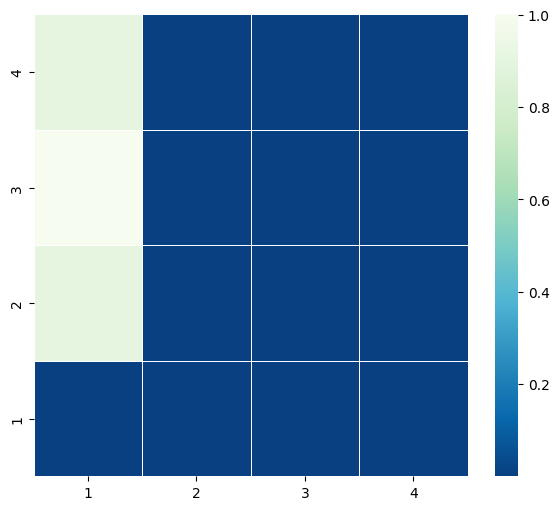

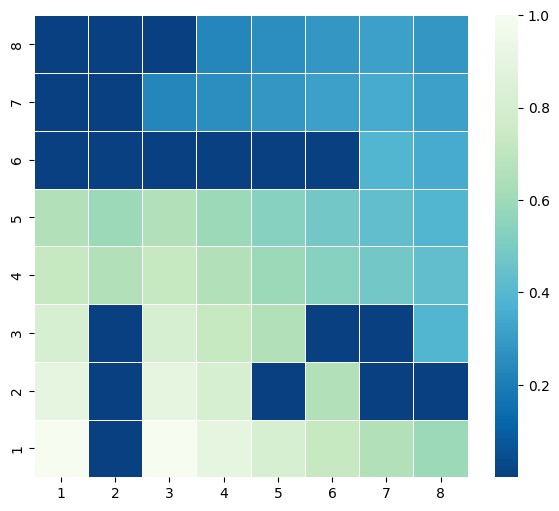

In [6]:
from pi_vi import SYNC, ASYNC_ORDERD, ASYNC_PERM

def run_policy_trial(env, policy_type=SYNC):
    initial_state = env.reset()
    env.render()
    time.sleep(1)  # just pauses so you can see the output
    total_reward = 0
    num_steps = 0

    # initialization
    gamma = 0.9
    tol = 1e-3

    print("running policy: ", policy_type)
    if policy_type == SYNC:
        state_policy, state_value_func, num_imrpovements, total_policy_eval_steps = pi_vi.policy_iteration_sync(
            env, gamma, max_iterations=int(1e3), tol=tol)
    elif policy_type == ASYNC_ORDERD:
        state_policy, state_value_func, num_imrpovements, total_policy_eval_steps = pi_vi.policy_iteration_async_ordered(
            env, gamma, max_iterations=int(1e3), tol=tol)
    elif policy_type == ASYNC_PERM:
        state_policy, state_value_func, num_imrpovements, total_policy_eval_steps = pi_vi.policy_iteration_async_randperm(
            env, gamma, max_iterations=int(1e3), tol=tol)
    print("total_policy_eval_steps: ", total_policy_eval_steps)
    pi_vi.display_policy_letters(env, np.array(state_policy))
    pi_vi.value_func_heatmap(env, state_value_func)
    print('Agent took %d steps' % num_steps)


env_4x4 = gym.make('Deterministic-4x4-FrozenLake-v0')
env_8x8 = gym.make('Deterministic-8x8-FrozenLake-v0')

run_policy_trial(env_4x4, policy_type=SYNC)
run_policy_trial(env_8x8, policy_type=SYNC)

# run_policy_trial(env_4x4, policy_type=ASYNC_ORDERD)
# run_policy_trial(env_8x8, policy_type=ASYNC_ORDERD)
